In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)

https://www.kaggle.com/gauthamp10/google-playstore-apps to the dataset

In [84]:
apps = pd.read_csv(r'C:\Users\User\Documents\apps\Google-Playstore.csv')

In [85]:
apps.replace([np.inf, -np.inf], np.nan, inplace=True) 
apps.dropna()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,2.7M,2.3 and up,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,5.8M,4.1 and up,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,59M,4.4 and up,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,29M,5.0 and up,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118129,Campaign Blaster Yuge Edition,com.unifeyed.CampaignBlasterYuge,Casual,0.0,0.0,50+,50.0,60,True,0.0,USD,27M,2.3 and up,UNIFEYED,http://www.unifeyed.com,development@unifeyed.com,"May 2, 2016","May 03, 2016",Everyone,http://unifeyed.com/privacy/,True,True,False
1118130,Safer Job Sites,com.unifeyed.safety,Productivity,0.0,0.0,5+,5.0,5,True,0.0,USD,4.3M,5.0 and up,UNIFEYED,https://unifeyed.com,development@unifeyed.com,"Aug 21, 2019","Dec 05, 2019",Everyone,https://unifeyed.com/privacy,False,False,False
1118132,AutoThink,com.fleetenable.autothink,Productivity,0.0,0.0,100+,100.0,127,True,0.0,USD,4.7M,4.1 and up,Imaginnovate,http://www.imaginnovate.com,krishna@imaginnovate.com,"Nov 26, 2019","Nov 13, 2020",Everyone,http://www.imaginnovate.com,False,False,False
1118133,FieldEnable,com.fieldenable.app.fieldenable,Business,0.0,0.0,100+,100.0,282,True,0.0,USD,28M,5.0 and up,Imaginnovate,http://www.imaginnovate.com,FieldEnable@imaginnovate.com,"Apr 30, 2018","Nov 30, 2020",Everyone,http://tw.fieldenable.com/privacy,False,False,False


fixing and editing the data:

don't need the ID,and name(dosent really matter) and it dosent matter what's the Developer Email and released time and Minimum Android doesnt matter for raiting so much: 

In [86]:
apps = apps.drop(['App Name','App Id','Developer Id','Developer Email','Released','Last Updated','Minimum Android','Developer Website','Price','Currency','Size','Privacy Policy'], axis=1)

In [87]:
np.mean(apps['Rating'])

2.490334441358455

seems so low, so i checked:

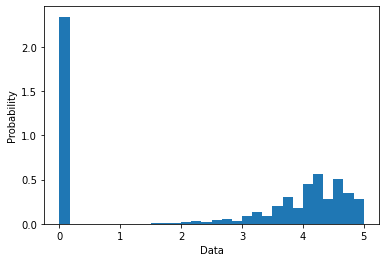

In [88]:
plt.hist(apps['Rating'], density=True, bins=30,) 
plt.ylabel('Probability')
plt.xlabel('Data');

you see that the ratings are so low becaurse some of the apps no one gave rating,
so i need to erase those:

In [89]:
apps= apps[apps['Rating'] != 0]

In [90]:
np.mean(apps['Rating'])

4.081693339881024

now it's seems good.

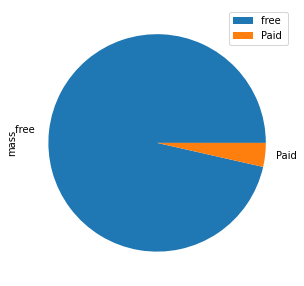

In [91]:
i = apps[apps['Free'] == True].shape[0]
j = apps[apps['Free'] == False].shape[0]
df = pd.DataFrame({'mass':[i,j ]},
                  index=['free ','Paid'])
plot = df.plot.pie(subplots=True, figsize=(5, 5))

so most is free, but how does it influence?

In [92]:
apps.groupby(['Free']).mean()['Rating']

Free
False    4.164402
True     4.078660
Name: Rating, dtype: float64

so the paid apps have higher rating (probarbly because the developer does better) but not a big difference.

In [93]:
apps.groupby(['Ad Supported']).mean()['Rating']

Ad Supported
False    4.030496
True     4.105307
Name: Rating, dtype: float64

that also seems reasonable because if a lot tries it so it's more likly that they won't like it,but still no big difference

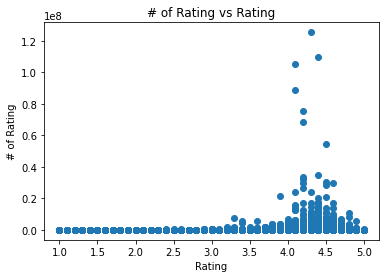

In [94]:
fig, ax = plt.subplots()
ax.scatter(apps['Rating'],apps['Rating Count'])
ax.set_title('# of Rating vs Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('# of Rating')
plt.show()

you can see that the beter it is the more people view it and like it 

because it's to long a take a little (my computer does'nt manage)

In [95]:
apps = apps[0:12000]

change to int:

In [96]:
apps = apps.astype({'Editors Choice': 'int32'})

In [97]:
apps = apps.astype({'Free': 'int32'})

In [98]:
apps = apps.astype({'In App Purchases': 'int32'})

In [99]:
apps = apps.astype({'Ad Supported': 'int32'})

make the intergers reasinable, and change str to int

In [100]:
logT = math.log(10)

for i in range(len(apps['Rating'])):
    
        if  type(apps.iat[i,3])==str: 
            apps.iat[i,3]=apps.iat[i,3].count('0') 
        apps.iat[i,2]/= apps['Rating Count'].max()
        if apps.iat[i,4] > 0:
            apps.iat[i,4] =  math.log(apps.iat[i,4])/ logT
        if apps.iat[i,5] > 0:
            apps.iat[i,5] =  math.log(apps.iat[i,5])/ logT

            

In [101]:
# Get one hot encoding of columns
one_hot = pd.get_dummies(apps['Category'])
one_hot2 = pd.get_dummies(apps['Content Rating'])
# Drop column as it is now encoded
apps = apps.drop('Category',axis = 1)
apps = apps.drop('Content Rating',axis = 1)
# Join the encoded df
apps = apps.join(one_hot)
apps = apps.join(one_hot2)


In [102]:
apps.replace([np.inf, -np.inf], np.nan, inplace=True) 
apps.dropna()


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Ad Supported,In App Purchases,Editors Choice,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,Card,Casino,Casual,Comics,Communication,Dating,Education,Educational,Entertainment,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Maps & Navigation,Medical,Music,Music & Audio,News & Magazines,Parenting,Personalization,Photography,Productivity,Puzzle,Racing,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,3.6,0.000053,5.0,5.00000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,4.3,0.000319,6.0,6.00000,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,4.2,0.009012,7.0,7.69897,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,4.2,0.022583,8.0,8.00000,8,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.2,0.000012,4.0,4.69897,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,4.8,0.248171,4.0,4.00000,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12570,4.1,1.000000,4.0,4.69897,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12572,4.6,0.057592,3.0,3.69897,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12574,3.5,0.178010,3.0,3.00000,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [103]:
apps = apps.apply(lambda x: [y if y <= 10.0 else 10.0 for y in x])
apps = apps.apply(lambda x: [y if y >= 0.0 else 0.0 for y in x])

In [104]:
appsTr = apps[:10000]

In [105]:
appsTe = apps[10000:12000]

In [106]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
knn = KNeighborsRegressor(n_neighbors=5)

In [108]:
knn.fit(appsTr.drop('Rating',axis=1),appsTr['Rating'])

KNeighborsRegressor()

In [109]:
knn.predict(appsTe.drop('Rating',axis=1))

array([4.28, 4.42, 4.42, ..., 3.72, 4.32, 4.14])

In [110]:
knn.score(appsTr.drop('Rating',axis=1), appsTr['Rating'])

0.6687644783665221

In [111]:
knn.score(appsTe.drop('Rating',axis=1), appsTe['Rating'])

0.5828511397995157

In [112]:
from sklearn.svm import SVR

In [113]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(appsTr.drop('Rating',axis=1),appsTr['Rating'])

SVR()

In [114]:
print(svr.score(appsTr.drop('Rating',axis=1), appsTr['Rating']))
print(svr.score(appsTe.drop('Rating',axis=1), appsTe['Rating']))

0.5342387286634562
0.6249502054429683


https://www.kaggle.com/aungpyaeap/tictactoe-endgame-dataset-uci to the dataset

In [139]:
tic_tac = pd.read_csv(r'C:\Users\User\Documents\TicTacToe\tic-tac-toe-endgame.csv')
tic_tac = tic_tac.rename(columns={"V10": "win"})

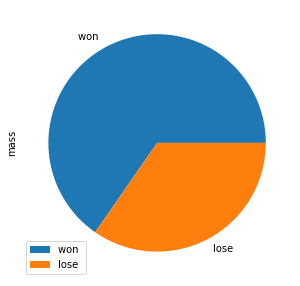

In [140]:
i = tic_tac[tic_tac['win'] == 'positive'].shape[0]
j = tic_tac[tic_tac['win'] == 'negative'].shape[0]
pie_tic= pd.DataFrame({'mass':[i,j ]},
                  index=['won ','lose'])
plot = pie_tic.plot.pie(subplots=True, figsize=(5, 5))

more chances of some one wining

In [141]:
pie_tic

,mass
won,626
lose,332


(array([0.52453027, 0.65448852, 0.32098121]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

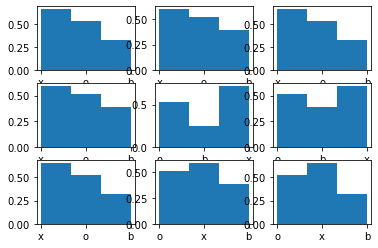

In [158]:
fig, ax = plt.subplots(3,3)
ax[0,0].hist(tic_tac['V1'], density=True, bins=3,)
ax[0,1].hist(tic_tac['V2'], density=True, bins=3,)
ax[0,2].hist(tic_tac['V3'], density=True, bins=3,)
ax[1,0].hist(tic_tac['V4'], density=True, bins=3,)
ax[1,1].hist(tic_tac['V5'], density=True, bins=3,)
ax[1,2].hist(tic_tac['V6'], density=True, bins=3,)
ax[2,0].hist(tic_tac['V7'], density=True, bins=3,)
ax[2,1].hist(tic_tac['V8'], density=True, bins=3,)
ax[2,2].hist(tic_tac['V9'], density=True, bins=3,)


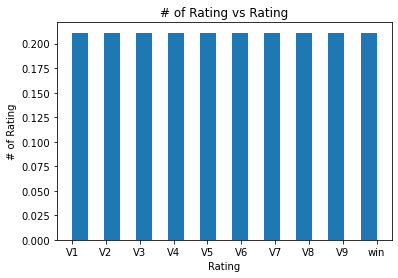

In [167]:
fig, ax = plt.subplots()
ax.hist(tic_tac, density=True, bins=19,)
ax.set_title('tic tac toe')
ax.set_xlabel('games')
ax.set_ylabel('places')
plt.show()

In [119]:


for i in range(1,10):
    current_colum = "V"+str(i)
    # Get one hot encoding of the columns
    one_hot = pd.get_dummies(tic_tac[current_colum],prefix=current_colum)
    # Drop the columns as they are now encoded
    tic_tac = tic_tac.drop(current_colum,axis = 1)
    # Join the encoded df
    tic_tac = tic_tac.join(one_hot)
    # Drop 'b'                           
    tic_tac = tic_tac.drop([current_colum+'_b'],axis=1)

In [120]:
tic_train = tic_tac[tic_tac.index % 5 != 0]
tic_test = tic_tac[tic_tac.index % 5 == 0]

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=1)

In [131]:
knn.fit(tic_train.drop('win',axis=1),tic_train['win'])

KNeighborsClassifier(n_neighbors=1)

In [132]:
knn.predict(tic_test.drop('win',axis=1))

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

In [133]:
knn.score(tic_train.drop('win',axis=1), tic_train['win'])

1.0

In [134]:
knn.score(tic_test.drop('win',axis=1), tic_test['win'])

1.0

it works!!! well... it is a game with rules

In [135]:
from sklearn.svm import SVC

In [136]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(tic_test.drop('win',axis=1),tic_test['win'])

SVC()

In [137]:
print(svc.score(tic_train.drop('win',axis=1), tic_train['win']))
print(svc.score(tic_test.drop('win',axis=1), tic_test['win']))

0.8785900783289817
0.9635416666666666
